In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/assignment/Assignment (1).csv


**Reading the dataset**

In [2]:
df=pd.read_csv("/kaggle/input/assignment/Assignment (1).csv")
print(df.head)

<bound method NDFrame.head of                                                 name rating      genre  year  \
0                                        The Shining      R      Drama  1980   
1                                    The Blue Lagoon      R  Adventure  1980   
2     Star Wars: Episode V - The Empire Strikes Back     PG     Action  1980   
3                                          Airplane!     PG     Comedy  1980   
4                                         Caddyshack      R     Comedy  1980   
...                                              ...    ...        ...   ...   
7663                                    More to Life    NaN      Drama  2020   
7664                                     Dream Round    NaN     Comedy  2020   
7665                                   Saving Mbango    NaN      Drama  2020   
7666                                    It's Just Us    NaN      Drama  2020   
7667                                       Tee em el    NaN     Horror  2020   

         

In [3]:
#importing libraries
import matplotlib.pyplot as plt
import seaborn as sns

In [4]:
df

,name,rating,genre,year,released,score,votes,director,writer,star,country,budget,gross,company,runtime
0,The Shining,R,Drama,1980,"June 13, 1980 (United States)",8.4,927000.0,Stanley Kubrick,Stephen King,Jack Nicholson,United Kingdom,19000000.0,46998772.0,Warner Bros.,146.0
1,The Blue Lagoon,R,Adventure,1980,"July 2, 1980 (United States)",5.8,65000.0,Randal Kleiser,Henry De Vere Stacpoole,Brooke Shields,United States,4500000.0,58853106.0,Columbia Pictures,104.0
2,Star Wars: Episode V - The Empire Strikes Back,PG,Action,1980,"June 20, 1980 (United States)",8.7,1200000.0,Irvin Kershner,Leigh Brackett,Mark Hamill,United States,18000000.0,538375067.0,Lucasfilm,124.0
3,Airplane!,PG,Comedy,1980,"July 2, 1980 (United States)",7.7,221000.0,Jim Abrahams,Jim Abrahams,Robert Hays,United States,3500000.0,83453539.0,Paramount Pictures,88.0
4,Caddyshack,R,Comedy,1980,"July 25, 1980 (United States)",7.3,108000.0,Harold Ramis,Brian Doyle-Murray,Chevy Chase,United States,6000000.0,39846344.0,Orion Pictures,98.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7663,More to Life,NaN,Drama,2020,"October 23, 2020 (United States)",3.1,18.0,Joseph Ebanks,Joseph Ebanks,Shannon Bond,United States,7000.0,NaN,NaN,90.0
7664,Dream Round,NaN,Comedy,2020,"February 7, 2020 (United States)",4.7,36.0,Dusty Dukatz,Lisa Huston,Michael Saquella,United States,NaN,NaN,Cactus Blue Entertainment,90.0
7665,Saving Mbango,NaN,Drama,2020,"April 27, 2020 (Cameroon)",5.7,29.0,Nkanya Nkwai,Lynno Lovert,Onyama Laura,United States,58750.0,NaN,Embi Productions,NaN
7666,It's Just Us,NaN,Drama,2020,"October 1, 2020 (United States)",NaN,NaN,James Randall,James Randall,Christina Roz,United States,15000.0,NaN,NaN,120.0


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7668 entries, 0 to 7667
Data columns (total 15 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   name      7668 non-null   object 
 1   rating    7591 non-null   object 
 2   genre     7668 non-null   object 
 3   year      7668 non-null   int64  
 4   released  7666 non-null   object 
 5   score     7665 non-null   float64
 6   votes     7665 non-null   float64
 7   director  7668 non-null   object 
 8   writer    7665 non-null   object 
 9   star      7667 non-null   object 
 10  country   7665 non-null   object 
 11  budget    5497 non-null   float64
 12  gross     7479 non-null   float64
 13  company   7651 non-null   object 
 14  runtime   7664 non-null   float64
dtypes: float64(5), int64(1), object(9)
memory usage: 898.7+ KB


The provided dataset contains various factors related to movies and their success at the movie theatre such as rating, votes, popularity, etc.
Howeveer to analyse the data effectively as per our concern, we need to focus on some aspect precisely, so, data cleaning is performed.

In [6]:
#checking for string and numerical data
cat_col = [col for col in df.columns if df[col].dtype == 'object']
print('Categorical columns :',cat_col)
# Numerical columns
num_col = [col for col in df.columns if df[col].dtype != 'object']
print('Numerical columns :',num_col)

Categorical columns : ['name', 'rating', 'genre', 'released', 'director', 'writer', 'star', 'country', 'company']
Numerical columns : ['year', 'score', 'votes', 'budget', 'gross', 'runtime']


In [7]:
#checking for unique values
df[cat_col].nunique()

name        7512
rating        12
genre         19
released    3414
director    2949
writer      4535
star        2814
country       59
company     2385
dtype: int64

**Data Cleaning**

In [8]:
#dropping extra columns for better visualization
df1 = df.drop(columns=['name','rating', 'released', 'director', 'writer', 'star', 'country', 'company'])
df1.shape

(7668, 7)

In [9]:
df1


,genre,year,score,votes,budget,gross,runtime
0,Drama,1980,8.4,927000.0,19000000.0,46998772.0,146.0
1,Adventure,1980,5.8,65000.0,4500000.0,58853106.0,104.0
2,Action,1980,8.7,1200000.0,18000000.0,538375067.0,124.0
3,Comedy,1980,7.7,221000.0,3500000.0,83453539.0,88.0
4,Comedy,1980,7.3,108000.0,6000000.0,39846344.0,98.0
...,...,...,...,...,...,...,...
7663,Drama,2020,3.1,18.0,7000.0,NaN,90.0
7664,Comedy,2020,4.7,36.0,NaN,NaN,90.0
7665,Drama,2020,5.7,29.0,58750.0,NaN,NaN
7666,Drama,2020,NaN,NaN,15000.0,NaN,120.0


<Axes: >

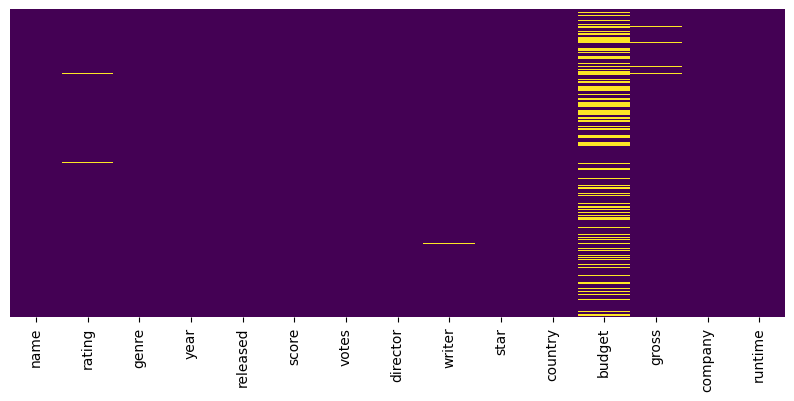

In [10]:
# heatmap to check the missing value
plt.figure(figsize =(10, 4))
sns.heatmap(df.isnull(), yticklabels = False, cbar = False, cmap ='viridis')

In [11]:
#getting percentage of missing data
round((df1.isnull().sum()/df1.shape[0])*100,2)

genre       0.00
year        0.00
score       0.04
votes       0.04
budget     28.31
gross       2.46
runtime     0.05
dtype: float64

In [12]:
df1.dropna(subset=['runtime','score','votes','gross'], axis=0, inplace=True)
df1.shape

(7478, 7)

In [13]:
# Mean imputation to add mean values to missing data
df2 = df1.fillna(df1.budget.mean())
# Let's check the null values again
df2.isnull().sum()

genre      0
year       0
score      0
votes      0
budget     0
gross      0
runtime    0
dtype: int64

<Axes: >

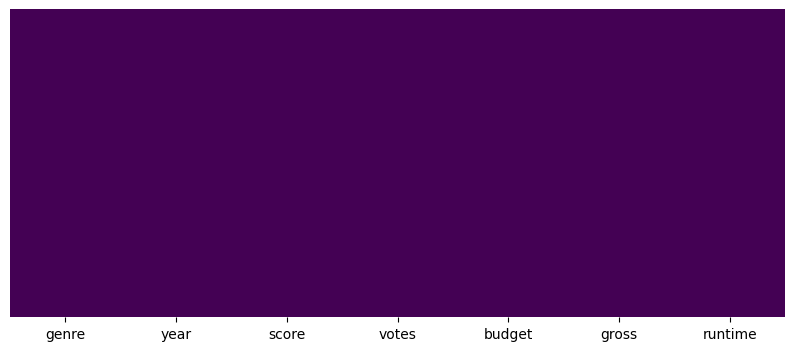

In [14]:
# heatmap to check the missing value
plt.figure(figsize =(10, 4))
sns.heatmap(df2.isnull(), yticklabels = False, cbar = False, cmap ='viridis')

**Data Visualization**

Visualisinf of data is necessary to analyse the data and to derive useful insights from it.

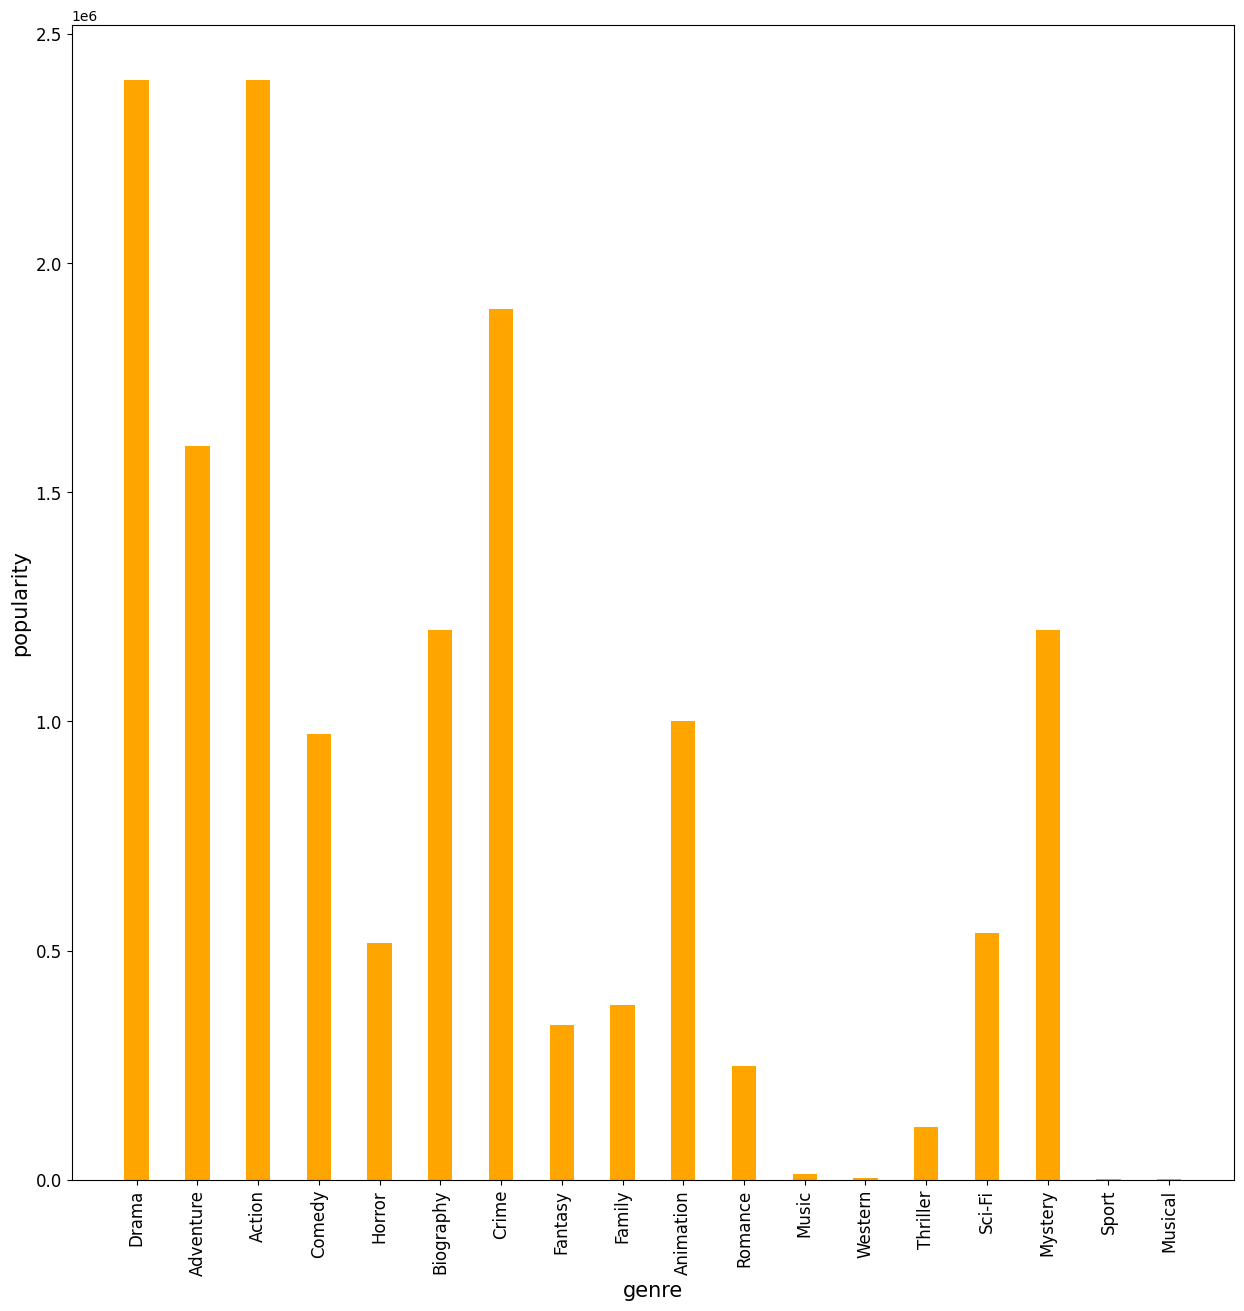

In [15]:
#Bar Chart to show popularity of different Genres
fig = plt.figure(figsize = (15, 15))
 
# creating the bar plot
plt.bar(df2['genre'],df2['votes'] , color ='orange',width = 0.4)
 
plt.xlabel("genre",fontsize=15)
plt.ylabel("popularity",fontsize=15)
plt.xticks(fontsize=12, rotation=90)
plt.yticks(fontsize=12)


plt.show()

The above  bar plot shows popularity of specific genre of movie according to the votes given by viewers. 
People preferred genres such as Action and Drama more over any other. These two genres were the most popular ones. While the Sport and Musical genres were the least popular ones.

array([[<Axes: title={'center': 'year'}>,
        <Axes: title={'center': 'score'}>],
       [<Axes: title={'center': 'votes'}>,
        <Axes: title={'center': 'budget'}>],
       [<Axes: title={'center': 'gross'}>,
        <Axes: title={'center': 'runtime'}>]], dtype=object)

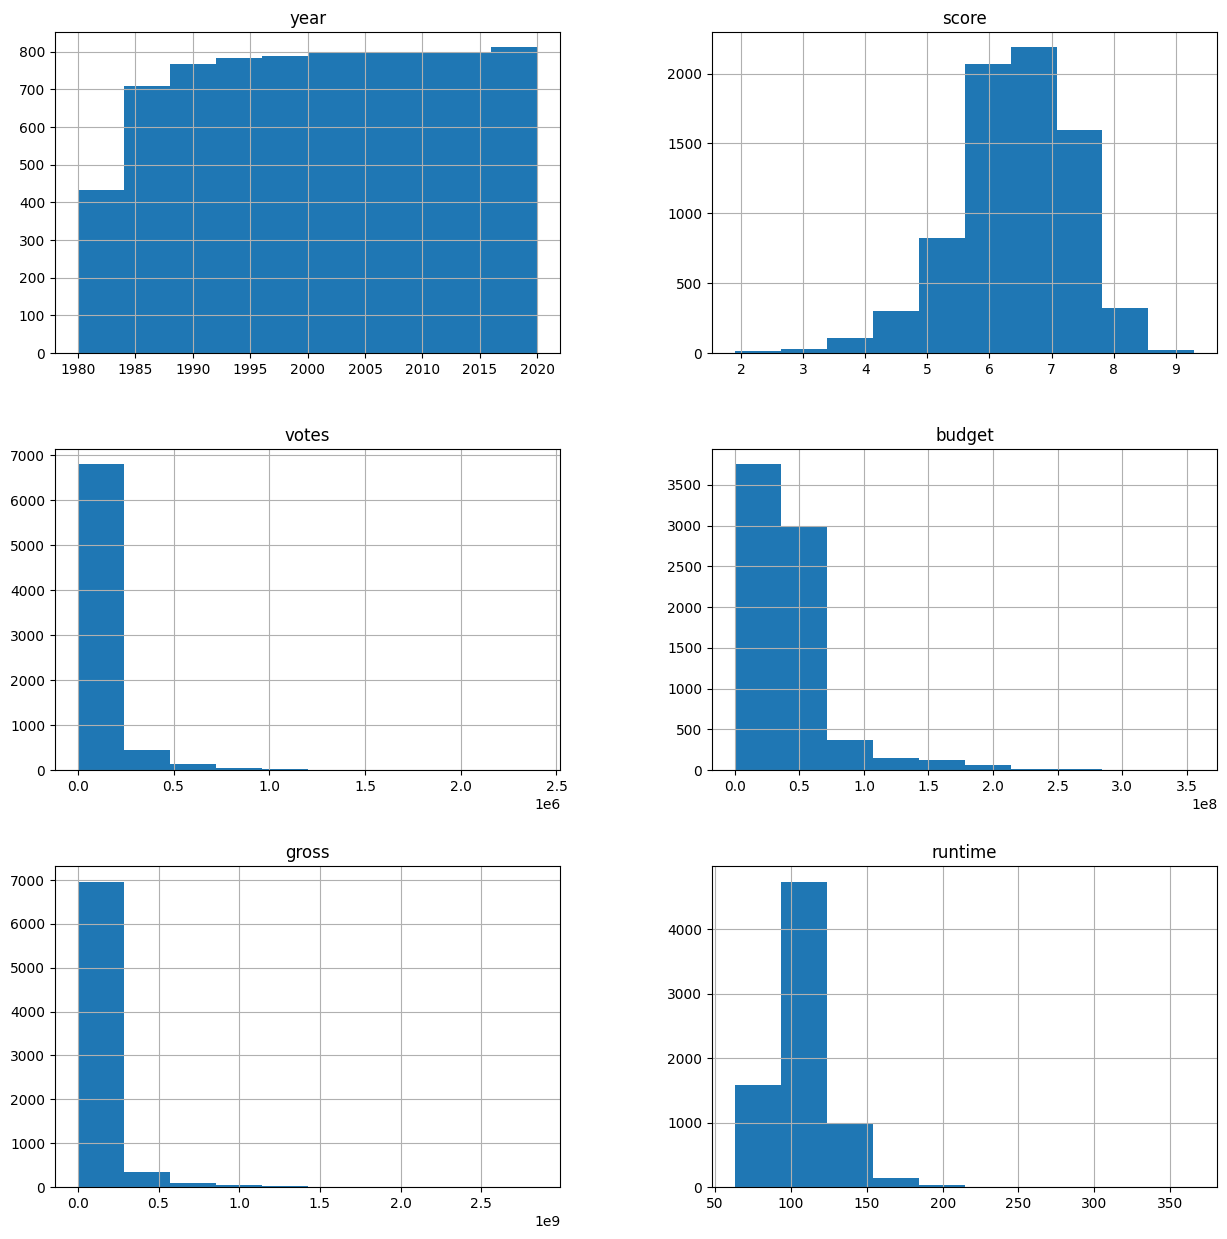

In [16]:
#histogram for additional information
df2.hist(figsize=(15,15))

<Figure size 640x480 with 0 Axes>

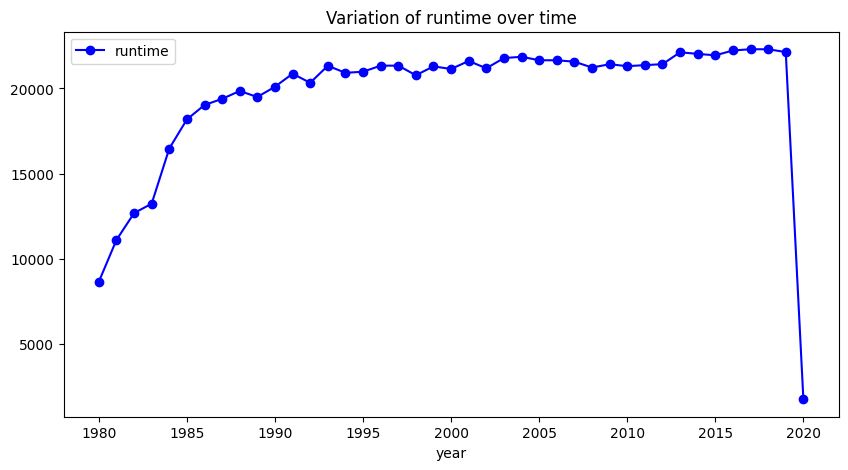

<Figure size 640x480 with 0 Axes>

In [17]:
#Line Graph ton show variation of runtime with time
axis = df2.groupby('year')[['runtime']].sum().plot(figsize = (10,5), marker = 'o', color = 'b')
axis.set_title('Variation of runtime over time')

plt.figure()

The runtime of movies first increased uptill the year 2000, stayed more or less the same for about 20 years, after which there was a sharp decline in the runtime of the movies.

<Figure size 640x480 with 0 Axes>

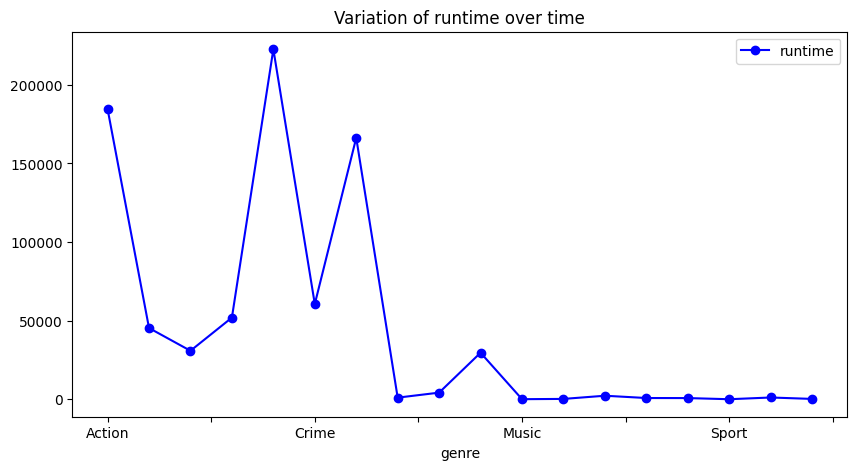

<Figure size 640x480 with 0 Axes>

In [18]:
#Line Graph ton show variation of runtime with time
axis = df2.groupby('genre')[['runtime']].sum().plot(figsize = (10,5), marker = 'o', color = 'b')
axis.set_title('Variation of runtime over time')

plt.figure()

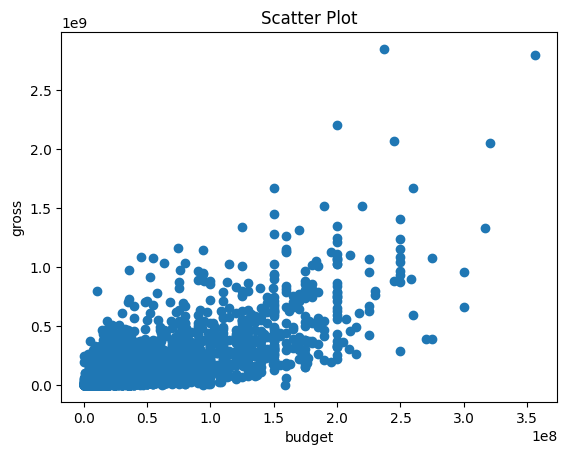

In [19]:
# Scatter plot with budget against gross
plt.scatter(df2['budget'], df2['gross'])
 
# Adding Title to the Plot
plt.title("Scatter Plot")
 
# Setting the X and Y labels
plt.xlabel('budget')
plt.ylabel('gross')

plt.show()

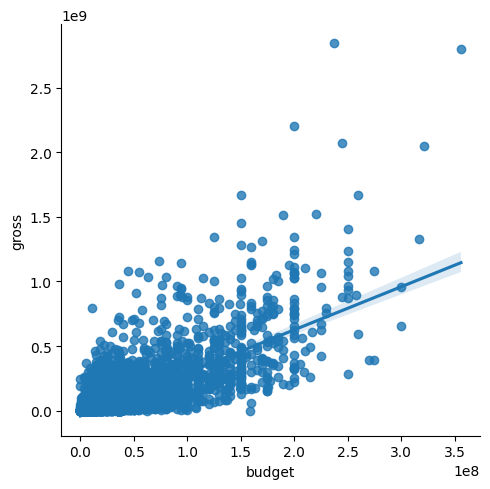

In [20]:
sns.lmplot(x = 'budget', y = 'gross', data = df2)

A large no of movies had less budget and generated less revenue while a few movies with large budget succeeded in generating better revenues.

**Recommendations**

Since Action and Drama genres are popular ones, consider making more movies in that genres.

Consider optimizing budget for better results, such as, audience surveys, market research etc.